# データ分析：日本のデータ

次のコードをアンコメントして実行しなさい。

In [2]:
# CELL PROVIDED

# import piplite
# await piplite.install(['py4macro','japanize_matplotlib_jlite'])

次のコードを実行しなさい。

In [3]:
import japanize_matplotlib_jlite
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py4macro

## GDP：三面等価の原則

GDPを財・サービスとお金の流れで考えよう

* GDP
    * 経済全体で生産された財・サービス（最終財）を円単位で合計
    * <span style="color:red">生産側GDP</span>
* 生産されたものは購入（消費や投資）される
    * 購入額の合計：支出側GDP
    * <span style="color:red">生産側GDP</span> = <span style="color:red">支出側GDP</span>
    * 「売れ残り」= 在庫投資（投資支出の一部）
* 誰かが購入すると誰かの所得となる
    * 所得の合計：分配側GDP
    * <span style="color:red">支出側GDP</span> = <span style="color:red">分配側GDP</span>

$$
\text{生産側GDP = 支出側GDP = 分配側GDP}
$$

これを<span style="color:blue">三面等価の原則</span>と呼ぶ

## 2023年の１年間の実質GDP

$$\phantom{ttt}$$

$$\phantom{ttt}$$

$$\LARGE 559,374,100,000,000\text{円}$$

又は

$$\LARGE 559\text{兆}3,741\text{億円}$$

$$\phantom{ttt}$$

$$\phantom{ttt}$$

2015暦年連鎖価格

## 一人当たりGDPの解釈

* 総生側GDP = 総支側GDP = <span style="color:red">分配側GDP</span>
* 分配側GDP = 所得の総合計
* 一人当たりGDPの意味

$$
\text{一人当たりGDP}=\frac{\text{GDP}}{\text{人口}}=\frac{\text{所得の総合計}}{\text{人口}}=\text{一人当たり所得}
$$

* 解釈
    * 総所得を全ての人に平等に同じ金額を分配した場合の金額
    * 「平均的な人」で捉えた生活水準
* 以下では、一人当たり実質GDPのデータを使い、日本の生活水準の変化を考える

## 日本の一人当たりGDP

* 内閣府の公式データ
* `1980`〜`2023`年
    * 時系列データ　→　動画のイメージ
* 単位：円
* 実質：`2015`年（参照年）

### 一人当たりGDPの推移

データの読み込み。

In [4]:
jpn = py4macro.data("jpn-yr")

含まれるデータの確認

In [5]:
py4macro.data("jpn-yr", description=True)


    | `gdp`:          国内総生産（GDP）
    | `consumption`:  消費
    | `investment`:   投資
    | `government`:   政府支出
    | `exports`:      輸出
    | `imports`:      輸入
    | `gdp_gap`:      GDPギャップ
    | `deflator`:     GDPデフレーター
    | `inflation`:    インフレ率
    | `unemployment_rate`: 失業率
    | `employed`:     就業者数
    | `population`:   人口
    | `gov_debt`:     政府負債
    | `gov_net_debt`: 政府純負債
    |
    | * 年次データ（暦年）
    |
    | ＜出典＞
    | GDPと各需要項目
    |    * 1994年~
    |        * 実額
    |        * 2015暦年（平成27年）連鎖価格
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |    * 1980年~1993年
    |        * 実額
    |        * 2015年（平成27年）基準支出側GDP系列簡易遡及（参考系列であり上のデータと接続可能）
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |
    | GDPギャップ
    |   * 単位：％
    |   * GDPの潜在GDPからの乖離
    |   * IMF World Economic Outlook
    |
    | GDPデフレーター
    |   * IMF World Economic Outlook
    |
    | インフレ率
    |   * 単位：％
    |   * 年平均
    |   * IMF World Economic Outlook
    |
    | 失業率
    |   * 単位：％
    |   

最初の5行

In [6]:
jpn.head()

,gdp,consumption,investment,government,exports,imports,gdp_gap,deflator,inflation,unemployment_rate,employed,population,gov_debt,gov_net_debt
,,,,,,,,,,,,,,
1980-01-01,273389.5,154892.6,65514.9,73312.8,18801.1,24334.3,-5.673,93.667,7.808,2.017,5536.1,11676.9,122341.9,44619.1
1981-01-01,285037.6,158798.7,66398.2,76678.7,21322.2,24924.2,-4.394,96.344,4.936,2.208,5581.8,11762.3,145038.3,57895.0
1982-01-01,294386.1,166201.2,66646.7,78175.5,21639.3,24780.8,-3.921,98.039,2.749,2.350,5638.6,11845.1,166617.3,73262.9
1983-01-01,305072.9,171815.5,66816.3,80466.8,22714.3,23980.5,-3.080,98.942,1.881,2.658,5732.7,11927.1,191704.6,90702.1
1984-01-01,318529.3,177226.5,70126.5,82233.3,26201.7,26526.0,-1.747,100.356,2.251,2.708,5766.0,12005.0,209705.2,103728.2


一人当たりGDPの列を作成

In [7]:
jpn['gdppc'] = jpn['gdp'] / jpn['population']
jpn.tail(3)

,gdp,consumption,investment,government,exports,imports,gdp_gap,deflator,inflation,unemployment_rate,employed,population,gov_debt,gov_net_debt,gdppc
,,,,,,,,,,,,,,,
2021-01-01,543720.6,289617.0,108013.1,145268.1,102784.4,101576.9,-1.618,101.730,-0.235,2.808,6712.3,12550.7,1403081.70,864306.60,43.321934
2022-01-01,550250.3,295888.9,111477.0,144772.6,108410.9,109590.9,-0.897,102.067,2.497,2.592,6722.7,12517.1,1439541.36,841397.00,43.959887
2023-01-01,560225.5,297668.3,112951.3,145839.6,111834.4,108148.8,0.164,105.897,3.268,2.567,6747.0,12462.1,1493689.64,922759.86,44.954342


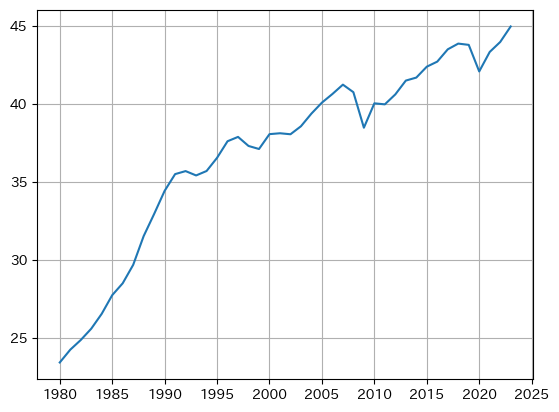

In [8]:
plt.plot(jpn['gdppc'])
plt.grid()
pass

* 縦軸の単位：10万円

### 一人当たりGDP（対数）の推移

一人当たりGDPを対数化し，新たな列`log_gdppc`として追加する。

In [9]:
jpn['log_gdppc'] = np.log( jpn['gdppc'] )
jpn.tail(2)

,gdp,consumption,investment,government,exports,imports,gdp_gap,deflator,inflation,unemployment_rate,employed,population,gov_debt,gov_net_debt,gdppc,log_gdppc
,,,,,,,,,,,,,,,,
2022-01-01,550250.3,295888.9,111477.0,144772.6,108410.9,109590.9,-0.897,102.067,2.497,2.592,6722.7,12517.1,1439541.36,841397.00,43.959887,3.783278
2023-01-01,560225.5,297668.3,112951.3,145839.6,111834.4,108148.8,0.164,105.897,3.268,2.567,6747.0,12462.1,1493689.64,922759.86,44.954342,3.805647


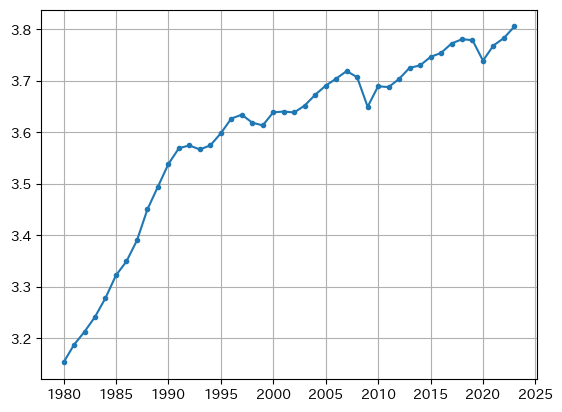

In [10]:
plt.plot(jpn['log_gdppc'], marker='.')
plt.grid()
pass

* 自然対数を使ってうれしい理由
    * 図を見て成長率を比較できる！
* 連続する点と点の直線の傾き
    * １年間の成長率（変化率）
* 離れた点と点の直線の傾き
    * 平均成長率（変化率）

### 成長率（変化率）の計算方法

* $y_t$：$t$年のGDP
* GDPの成長率（変化率）：$g_t$

$$
g_t=\frac{y_{t}}{y_{t-1}}-1
\quad\Rightarrow\quad
1+g_t=\frac{y_{t}}{y_{t-1}}
$$

* 例：$y_{t}=105$、$y_{t-1}=100$

$$1.05=\frac{105}{100}\quad\Rightarrow\quad\text{5％}$$
  
* 両辺の自然対数をとる
$$
\log(1+g_t)=\log(y_{t})-\log(y_{t-1})
$$

$$
\qquad\qquad\quad\Downarrow\quad\\
\text{左辺を近似}\;\log(1+g_t)\\
\approx g_t
$$

$$
g_t\approx\log(x_{t+1})-\log(x_{t})
$$

* `y_t`の成長率である$g_t$は，`y_t`の対数の差分。即ち，縦軸に`y_t`の対数，横軸に時間をおけば，プロットの傾きは`y_t`の成長率と等しいことになる。

### 一人当たりGDPの成長率

メソッド`.diff`は差分を計算する。

In [15]:
jpn['growth'] = jpn['log_gdppc'].diff()
jpn.head()

,gdp,consumption,investment,government,exports,imports,gdp_gap,deflator,inflation,unemployment_rate,employed,population,gov_debt,gov_net_debt,gdppc,log_gdppc,growth
,,,,,,,,,,,,,,,,,
1980-01-01,273389.5,154892.6,65514.9,73312.8,18801.1,24334.3,-5.673,93.667,7.808,2.017,5536.1,11676.9,122341.9,44619.1,23.412849,3.153285,NaN
1981-01-01,285037.6,158798.7,66398.2,76678.7,21322.2,24924.2,-4.394,96.344,4.936,2.208,5581.8,11762.3,145038.3,57895.0,24.233152,3.187722,0.034437
1982-01-01,294386.1,166201.2,66646.7,78175.5,21639.3,24780.8,-3.921,98.039,2.749,2.350,5638.6,11845.1,166617.3,73262.9,24.852986,3.212978,0.025256
1983-01-01,305072.9,171815.5,66816.3,80466.8,22714.3,23980.5,-3.080,98.942,1.881,2.658,5732.7,11927.1,191704.6,90702.1,25.578129,3.241738,0.028760
1984-01-01,318529.3,177226.5,70126.5,82233.3,26201.7,26526.0,-1.747,100.356,2.251,2.708,5766.0,12005.0,209705.2,103728.2,26.533053,3.278391,0.036654


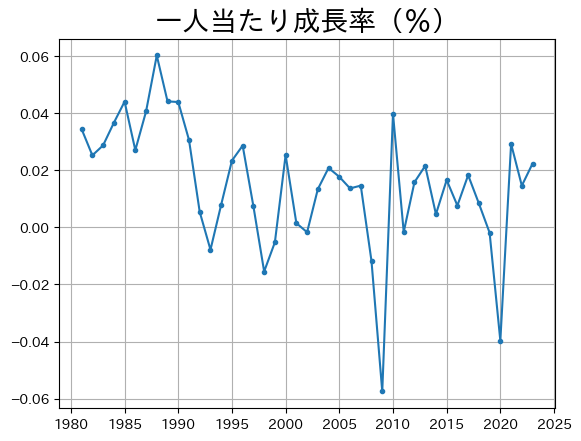

In [16]:
plt.plot(jpn['growth'], marker='.')
plt.title('一人当たり成長率（％）', size=20)
plt.grid()
pass

* 成長率が正の場合
    * 一人当たりGDPは増えている
    * 「景気が良い」
* 成長率が負の場合
    * 一人当たりGDPは減っている
    * 「景気が悪い」

（算術）平均はメソッド`.mean()`で計算できる。

In [17]:
jpn['growth'].mean()

0.01517121757422065

## まとめ

* GDP = 総生産 = 総支出 = 総所得
* 一人当たりGDP = 「平均的な人」で捉えた生活水準
* バブル景気後の成長率は低い